# Import Library

In [136]:
! pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [137]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
import tensorflow as tf
from scikeras.wrappers import KerasRegressor

from sklearn.metrics import mean_squared_error

%matplotlib inline

# Load Dataset

In [138]:
# load the dataset from https://www.kaggle.com/datasets/mirichoi0218/insurance
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
insurance = pd.read_csv(url)

# Data Understanding

In [139]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Deskripsi Variabel

- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

In [140]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [141]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [142]:
numerical_features = ['age', 'bmi', 'children', 'charges']
categorical_features = ['sex', 'smoker', 'region']

## Missing Value

In [143]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [144]:
age = (insurance.age == 0).sum()
bmi = (insurance.bmi == 0).sum()
 
print("Nilai 0 di kolom age ada: ", age)
print("Nilai 0 di kolom bmi ada: ", bmi)

Nilai 0 di kolom age ada:  0
Nilai 0 di kolom bmi ada:  0


## Data Outlier

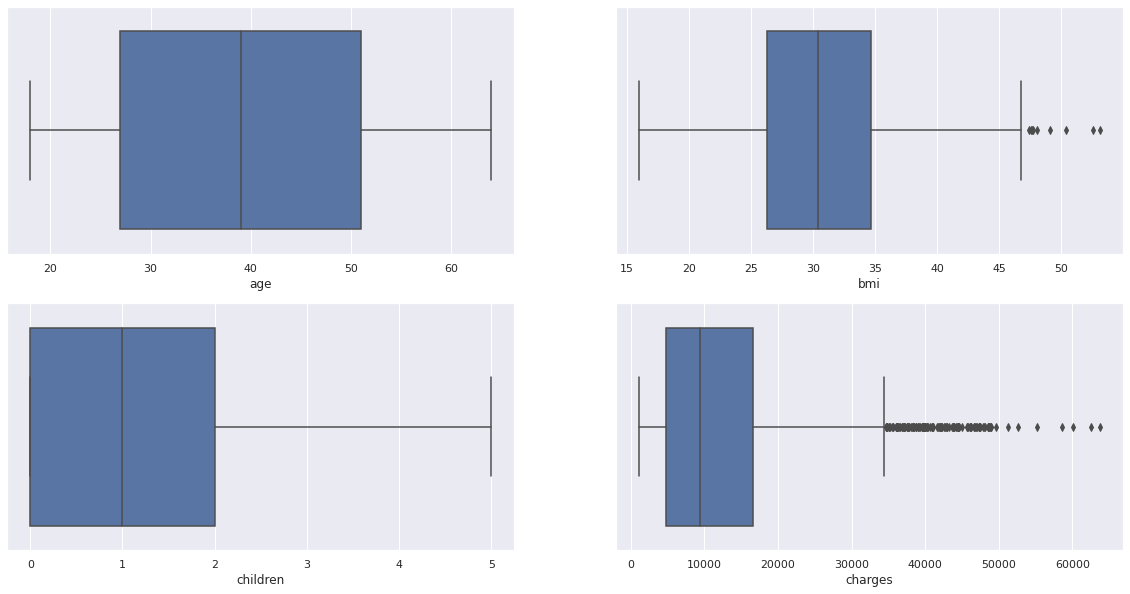

In [145]:
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(20,10))

sns.boxplot(x=insurance[numerical_features[0]], ax=axes[0,0])
sns.boxplot(x=insurance[numerical_features[1]], ax=axes[0,1])
sns.boxplot(x=insurance[numerical_features[2]], ax=axes[1,0])
sns.boxplot(x=insurance[numerical_features[3]], ax=axes[1,1])

### remove bmi feature

In [146]:
Q1 = insurance['bmi'].quantile(0.25)
Q3 = insurance['bmi'].quantile(0.75)
IQR=Q3-Q1

In [147]:
print("bmi Data Outlier:")
insurance[(insurance['bmi'] < (Q1-1.5*IQR)) | (insurance['bmi'] > (Q3+1.5*IQR))]

bmi Data Outlier:


,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [148]:
index = insurance[(insurance['bmi'] < (Q1-1.5*IQR)) | (insurance['bmi'] > (Q3+1.5*IQR))].index
insurance = insurance.drop(index=index)

### remove some charges data

In [149]:
insurance.sort_values(by=['charges'], ascending=False).head(10)

,age,sex,bmi,children,smoker,region,charges
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
34,28,male,36.400,1,yes,southwest,51194.55914
1241,64,male,36.960,2,yes,southeast,49577.66240
1062,59,male,41.140,1,yes,southeast,48970.24760
488,44,female,38.060,0,yes,southeast,48885.13561
175,63,female,37.700,0,yes,southwest,48824.45000


In [150]:
# remove charges data above 50000
index = insurance[insurance['charges'] > 50000].index
insurance = insurance.drop(index=index)

In [151]:
insurance.shape

(1323, 7)

## Univariate Analysis

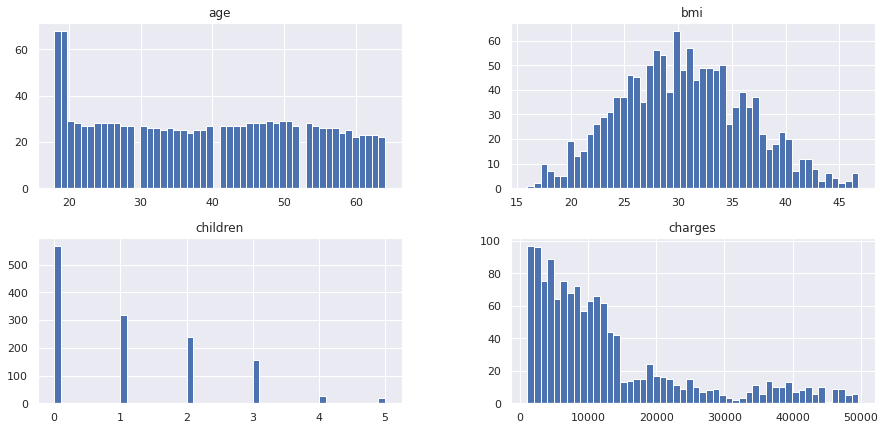

In [152]:
# numerical feature
insurance.hist(bins=50, figsize=(15,7))
plt.show()

   total  percentage
0    568        42.9
1    318        24.0
2    238        18.0
3    156        11.8
4     25         1.9
5     18         1.4


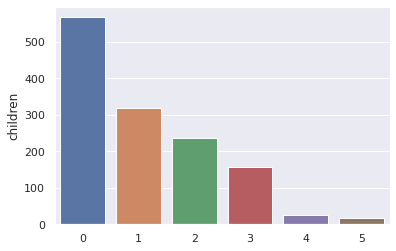

In [153]:
# children feature
feature = numerical_features[2]
count = insurance[feature].value_counts()
percent = 100*insurance[feature].value_counts(normalize=True)
df = pd.DataFrame({'total':count, 'percentage':percent.round(1)})
print(df)

sns.set(style="darkgrid")
sns.barplot(x=insurance[feature].value_counts().keys(), y=count)
plt.show()

        total  percentage
male      666        50.3
female    657        49.7


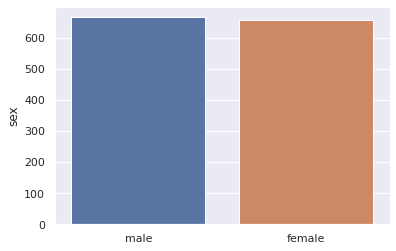

In [154]:
# sex feature
feature = categorical_features[0]
count = insurance[feature].value_counts()
percent = 100*insurance[feature].value_counts(normalize=True)
df = pd.DataFrame({'total':count, 'percentage':percent.round(1)})
print(df)

sns.set(style="darkgrid")
sns.barplot(x=insurance[feature].value_counts().keys(), y=count)
plt.show()

     total  percentage
no    1058        80.0
yes    265        20.0


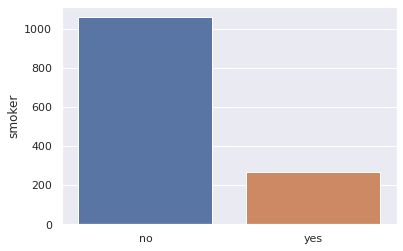

In [155]:
# smoker feature
feature = categorical_features[1]
count = insurance[feature].value_counts()
percent = 100*insurance[feature].value_counts(normalize=True)
df = pd.DataFrame({'total':count, 'percentage':percent.round(1)})
print(df)

sns.set(style="darkgrid")
sns.barplot(x=insurance[feature].value_counts().keys(), y=count)
plt.show()

           total  percentage
southeast    356        26.9
northwest    323        24.4
southwest    322        24.3
northeast    322        24.3


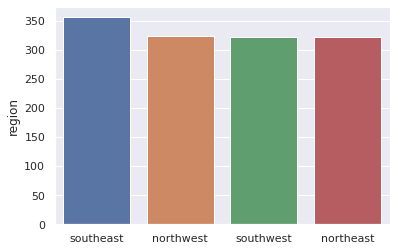

In [156]:
# region feature
feature = categorical_features[2]
count = insurance[feature].value_counts()
percent = 100*insurance[feature].value_counts(normalize=True)
df = pd.DataFrame({'total':count, 'percentage':percent.round(1)})
print(df)

sns.set(style="darkgrid")
sns.barplot(x=insurance[feature].value_counts().keys(), y=count)
plt.show()

## Multivariate Analysis

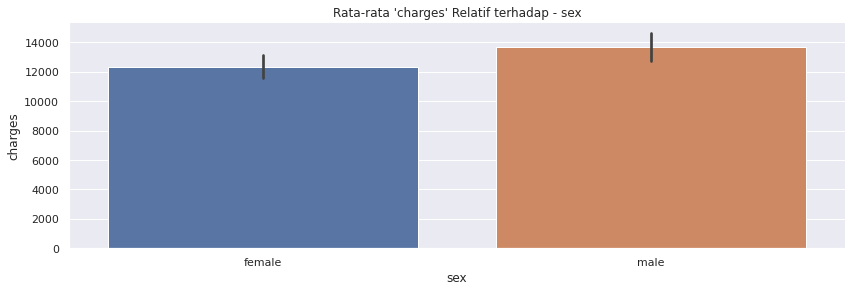

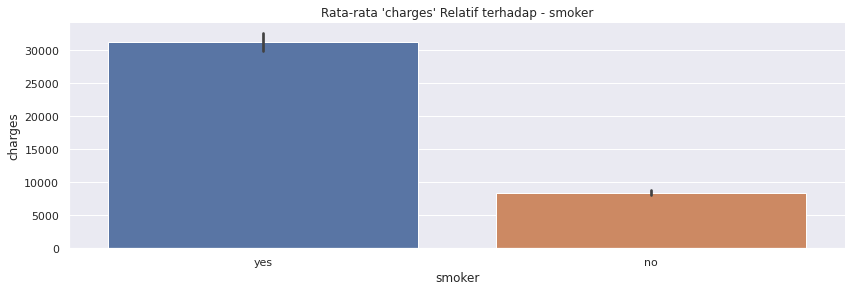

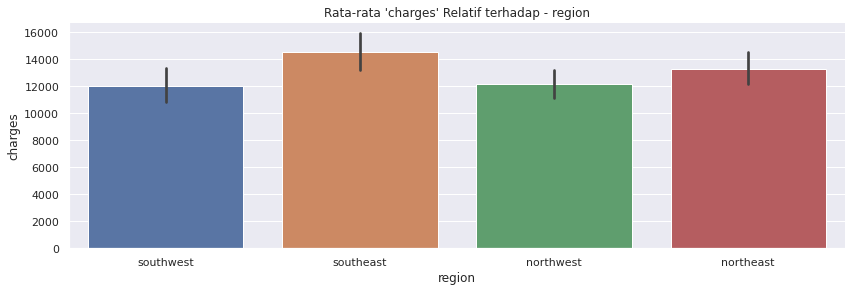

In [157]:
for col in categorical_features:
  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 4, aspect = 3, data=insurance)
  plt.title("Rata-rata 'charges' Relatif terhadap - {}".format(col))

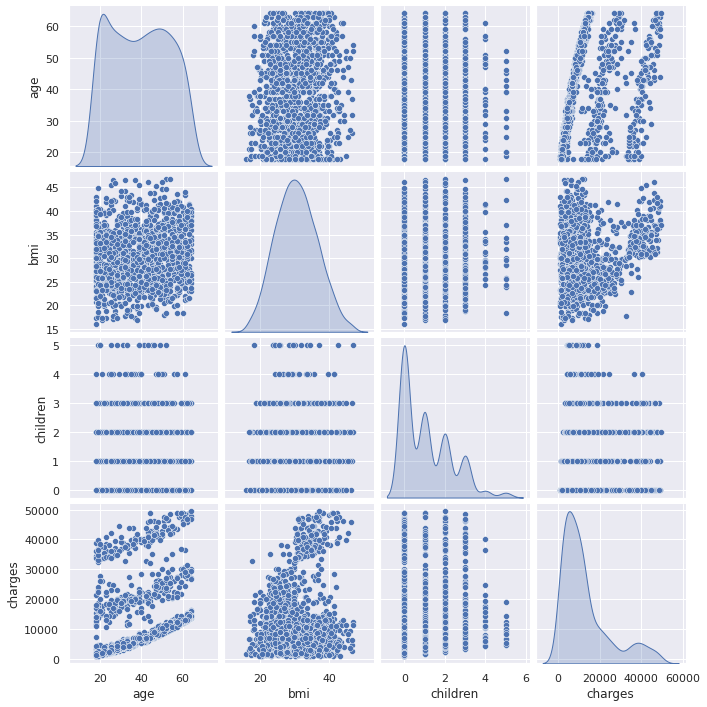

In [158]:
sns.pairplot(insurance, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

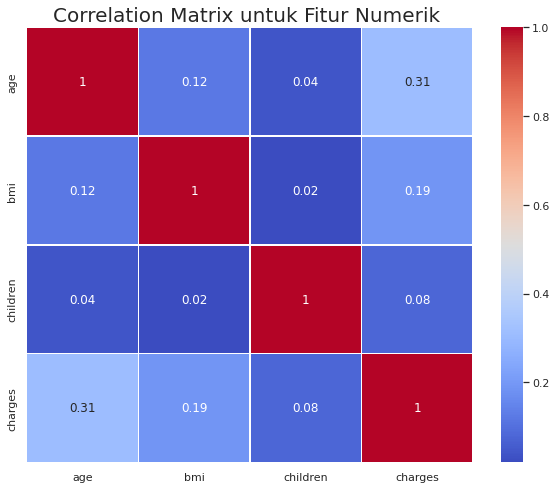

In [159]:
plt.figure(figsize=(10, 8))
correlation_matrix = insurance.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [160]:
# drop children feature because it has low corelation (0.07)
insurance.drop(['children'], inplace=True, axis=1)
insurance.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520


# Data Preparation

## Encoding

In [161]:
# encode sex feature
enc = OrdinalEncoder()
enc_sex = enc.fit_transform(insurance['sex'].values.reshape(-1,1))
insurance['sex'] = enc_sex.reshape(1, -1)[0].astype(int)

In [162]:
# encode smoker feature
enc = OrdinalEncoder()
enc_smoker = enc.fit_transform(insurance['smoker'].values.reshape(-1,1))
insurance['smoker'] = enc_sex.reshape(1, -1)[0].astype(int)

In [163]:
# encode region feature
insurance = pd.concat([insurance, pd.get_dummies(insurance['region'], prefix='region')],axis=1)
insurance.drop(['region'], axis=1, inplace=True)

In [164]:
insurance.head()

,age,sex,bmi,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,16884.92400,0,0,0,1
1,18,1,33.770,1,1725.55230,0,0,1,0
2,28,1,33.000,1,4449.46200,0,0,1,0
3,33,1,22.705,1,21984.47061,0,1,0,0
4,32,1,28.880,1,3866.85520,0,1,0,0


## Splitting Dataset

In [165]:
X = insurance.drop(["charges"],axis=1)
y = insurance["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [166]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1323
Total # of sample in train dataset: 1124
Total # of sample in test dataset: 199


## Standardization

In [167]:
numerical_features = ['age', 'bmi']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])

In [168]:
X_train.head()

,age,sex,bmi,smoker,region_northeast,region_northwest,region_southeast,region_southwest
451,-0.648129,1,-1.053703,1,0,1,0,0
393,0.719738,1,0.168893,1,1,0,0,0
896,0.287780,0,-1.745436,0,1,0,0,0
642,1.583654,1,0.603237,1,1,0,0,0
1113,-0.792115,0,-0.683707,0,0,1,0,0


# Model Development

## K Nearest Neighbors

In [169]:
knn_params = {'n_neighbors': [1, 3, 6, 10, 15, 21]}
knn_estimator = KNeighborsRegressor()
knn = GridSearchCV(estimator=knn_estimator, param_grid=knn_params, scoring='neg_mean_squared_error')
knn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 6, 10, 15, 21]},
             scoring='neg_mean_squared_error')

In [170]:
print("Best Estimator:", knn.best_estimator_)
print("Best Score:", knn.best_score_)

Best Estimator: KNeighborsRegressor(n_neighbors=21)
Best Score: -126865357.842845


In [171]:
means = knn.cv_results_['mean_test_score']
stds = knn.cv_results_['std_test_score']
params = knn.cv_results_['params']
print("mean_test_score | std_test_score with: params")
for mean, stdev, param in zip(means, stds, params):
    print("%f | (%f) with: %r" % (mean, stdev, param))

mean_test_score | std_test_score with: params
-237052617.529261 | (25340162.280366) with: {'n_neighbors': 1}
-154781868.643013 | (17413500.637074) with: {'n_neighbors': 3}
-137588911.863427 | (13456091.660276) with: {'n_neighbors': 6}
-130663719.070448 | (10439591.356618) with: {'n_neighbors': 10}
-129627748.447250 | (9149937.748438) with: {'n_neighbors': 15}
-126865357.842845 | (8543500.633042) with: {'n_neighbors': 21}


## Random Forest

In [172]:
RF_params = {
    'n_estimators': [30, 50, 100, 150, 200],
    'max_depth': [None, 16, 32, 64]
    }
RF_estimator = RandomForestRegressor(random_state=42, n_jobs=-1)
RF = GridSearchCV(estimator=RF_estimator, param_grid=RF_params, scoring='neg_mean_squared_error')
RF.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [None, 16, 32, 64],
                         'n_estimators': [30, 50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [173]:
print("Best Estimator:", RF.best_estimator_)
print("Best Score:", RF.best_score_)

Best Estimator: RandomForestRegressor(max_depth=16, n_estimators=150, n_jobs=-1,
                      random_state=42)
Best Score: -143738339.9118495


In [174]:
means = RF.cv_results_['mean_test_score']
stds = RF.cv_results_['std_test_score']
params = RF.cv_results_['params']
print("mean_test_score | std_test_score with: params")
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

mean_test_score | std_test_score with: params
-147284911.322931 (16498876.839821) with: {'max_depth': None, 'n_estimators': 30}
-146137329.401260 (16526020.403304) with: {'max_depth': None, 'n_estimators': 50}
-144897169.896425 (16155264.819043) with: {'max_depth': None, 'n_estimators': 100}
-144560725.047786 (15975373.169902) with: {'max_depth': None, 'n_estimators': 150}
-144633957.382563 (15768635.009804) with: {'max_depth': None, 'n_estimators': 200}
-147060452.578452 (16540150.678115) with: {'max_depth': 16, 'n_estimators': 30}
-145854101.282563 (16896667.577173) with: {'max_depth': 16, 'n_estimators': 50}
-144286494.376783 (15993584.970384) with: {'max_depth': 16, 'n_estimators': 100}
-143738339.911849 (16006030.498809) with: {'max_depth': 16, 'n_estimators': 150}
-143971162.677600 (15699081.711477) with: {'max_depth': 16, 'n_estimators': 200}
-147284911.322931 (16498876.839821) with: {'max_depth': 32, 'n_estimators': 30}
-146137329.401260 (16526020.403304) with: {'max_depth': 32

## AdaBoost

In [175]:
boosting_params = {
    'n_estimators': [15, 30, 50, 100],
    'learning_rate': [0.005, 0.05, 0.5, 1]
    }
boosting_estimator = AdaBoostRegressor(random_state=42)
boosting = GridSearchCV(estimator=boosting_estimator, param_grid=boosting_params, scoring='neg_mean_squared_error')
boosting.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostRegressor(random_state=42),
             param_grid={'learning_rate': [0.005, 0.05, 0.5, 1],
                         'n_estimators': [15, 30, 50, 100]},
             scoring='neg_mean_squared_error')

In [176]:
print("Best Estimator:", boosting.best_estimator_)
print("Best Score:", boosting.best_score_)

Best Estimator: AdaBoostRegressor(learning_rate=0.005, n_estimators=100, random_state=42)
Best Score: -122510808.63991885


In [177]:
means = boosting.cv_results_['mean_test_score']
stds = boosting.cv_results_['std_test_score']
params = boosting.cv_results_['params']
print("mean_test_score | std_test_score with: params")
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

mean_test_score | std_test_score with: params
-123162352.623728 (10443624.617998) with: {'learning_rate': 0.005, 'n_estimators': 15}
-122987596.521027 (9642180.854195) with: {'learning_rate': 0.005, 'n_estimators': 30}
-122675531.857457 (9610077.479041) with: {'learning_rate': 0.005, 'n_estimators': 50}
-122510808.639919 (8667876.445030) with: {'learning_rate': 0.005, 'n_estimators': 100}
-123254425.167231 (9074340.640534) with: {'learning_rate': 0.05, 'n_estimators': 15}
-123277150.095297 (7994175.052963) with: {'learning_rate': 0.05, 'n_estimators': 30}
-123772481.822563 (7177976.366041) with: {'learning_rate': 0.05, 'n_estimators': 50}
-126082715.897090 (6808777.648890) with: {'learning_rate': 0.05, 'n_estimators': 100}
-126942064.986046 (8554117.771821) with: {'learning_rate': 0.5, 'n_estimators': 15}
-127051948.973104 (8768557.513287) with: {'learning_rate': 0.5, 'n_estimators': 30}
-127051948.973104 (8768557.513287) with: {'learning_rate': 0.5, 'n_estimators': 50}
-127051948.9731

## Support Vector Machine

In [178]:
svm_params = {
    'kernel': ['rbf', 'sigmoid'],
    'C': [1, 3, 6, 10, 15, 20]
    }
svm_estimator = SVR()
svm = GridSearchCV(estimator=svm_estimator, param_grid=svm_params, scoring='neg_mean_squared_error')
svm.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 3, 6, 10, 15, 20],
                         'kernel': ['rbf', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [179]:
print("Best Estimator:", svm.best_estimator_)
print("Best Score:", svm.best_score_)

Best Estimator: SVR(C=6, kernel='sigmoid')
Best Score: -151112531.66046908


In [180]:
means = svm.cv_results_['mean_test_score']
stds = svm.cv_results_['std_test_score']
params = svm.cv_results_['params']
print("mean_test_score | std_test_score with: params")
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

mean_test_score | std_test_score with: params
-152262049.680334 (10755804.746422) with: {'C': 1, 'kernel': 'rbf'}
-152008972.983945 (10880376.897193) with: {'C': 1, 'kernel': 'sigmoid'}
-152008547.519657 (10973042.216585) with: {'C': 3, 'kernel': 'rbf'}
-151364337.718839 (11159373.775342) with: {'C': 3, 'kernel': 'sigmoid'}
-151879182.653759 (11077199.766630) with: {'C': 6, 'kernel': 'rbf'}
-151112531.660469 (11589292.718487) with: {'C': 6, 'kernel': 'sigmoid'}
-151724175.702482 (11088566.136385) with: {'C': 10, 'kernel': 'rbf'}
-151241487.813537 (11988133.352514) with: {'C': 10, 'kernel': 'sigmoid'}
-151608527.102911 (11334414.466716) with: {'C': 15, 'kernel': 'rbf'}
-151967956.252499 (12396954.001293) with: {'C': 15, 'kernel': 'sigmoid'}
-151889752.992690 (11607860.779026) with: {'C': 20, 'kernel': 'rbf'}
-152991528.472361 (13349549.448385) with: {'C': 20, 'kernel': 'sigmoid'}


## Neural Network Tensorflow

In [181]:
tf.random.set_seed(42)

def create_model():
	tensor = tf.keras.Sequential([
      tf.keras.layers.Dense(16, activation='relu', input_shape=[8,]),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1),
  ])
	return tensor

tensor_estimator = KerasRegressor(model=create_model, verbose=0)

tensor_params = {
    'optimizer': ['RMSprop', 'Adam'],
    'loss': ['mse', 'huber'],
    'epochs': [50, 100, 150]
}

tensor = GridSearchCV(estimator=tensor_estimator, param_grid=tensor_params, scoring='neg_mean_squared_error', n_jobs=-1)
tensor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(estimator=KerasRegressor(model=<function create_model at 0x7f167b103320>, verbose=0),
             n_jobs=-1,
             param_grid={'epochs': [50, 100, 150], 'loss': ['mse', 'huber'],
                         'optimizer': ['RMSprop', 'Adam']},
             scoring='neg_mean_squared_error')

In [182]:
print("Best Estimator:", tensor.best_estimator_)
print("Best Score:", tensor.best_score_)

Best Estimator: KerasRegressor(
	model=<function create_model at 0x7f167b103320>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=RMSprop
	loss=mse
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
)
Best Score: -120666910.91840395


In [183]:
means = tensor.cv_results_['mean_test_score']
stds = tensor.cv_results_['std_test_score']
params = tensor.cv_results_['params']
print("mean_test_score | std_test_score with: params")
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

mean_test_score | std_test_score with: params
-120666910.918404 (9366668.452327) with: {'epochs': 50, 'loss': 'mse', 'optimizer': 'RMSprop'}
-120946984.129820 (9101642.449856) with: {'epochs': 50, 'loss': 'mse', 'optimizer': 'Adam'}
-156885036.817875 (15970558.476103) with: {'epochs': 50, 'loss': 'huber', 'optimizer': 'RMSprop'}
-157815815.488131 (17329257.614572) with: {'epochs': 50, 'loss': 'huber', 'optimizer': 'Adam'}
-120947090.180983 (10136695.256762) with: {'epochs': 100, 'loss': 'mse', 'optimizer': 'RMSprop'}
-120885049.276668 (9343967.033108) with: {'epochs': 100, 'loss': 'mse', 'optimizer': 'Adam'}
-158455322.168230 (17133772.901857) with: {'epochs': 100, 'loss': 'huber', 'optimizer': 'RMSprop'}
-157275105.477030 (15647200.913241) with: {'epochs': 100, 'loss': 'huber', 'optimizer': 'Adam'}
-120927402.624001 (9164873.075752) with: {'epochs': 150, 'loss': 'mse', 'optimizer': 'RMSprop'}
-120692440.185528 (9392371.958089) with: {'epochs': 150, 'loss': 'mse', 'optimizer': 'Adam'}


# Evaluation

In [184]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [185]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting', 'SVM', 'Tensorflow'])
 
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting, 'SVM': svm, 'Tensorflow': tensor}
 
for name, model in model_dict.items():
  mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
  mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,113656.317417,115089.320615
RF,21458.2603,144220.198493
Boosting,114916.727735,117633.173742
SVM,150414.137986,142707.859543
Tensorflow,118781.874706,116948.339316


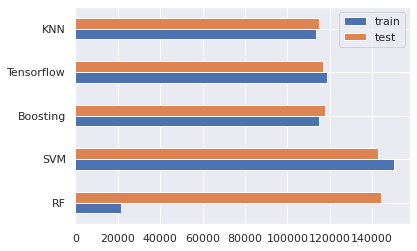

In [186]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [194]:
np.random.seed(13)

int_rand = np.random.randint(0, 100)

prediksi = X_test.iloc[int_rand:int_rand+2].copy()
pred_dict = {'y_true':y_test[int_rand:int_rand+2]}

for name, model in model_dict.items():
  pred_dict['prediksi_'+name] = model.predict(prediksi).round(1).reshape(1, -1)[0]
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting,prediksi_SVM,prediksi_Tensorflow
433,12638.195,17441.9,19073.5,20757.2,9946.4,16721.400391
602,11070.535,12386.2,12426.3,14361.6,9595.5,14136.400391
